In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.animation as animation
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.stats import kruskal

## Reading data from CSV 

In [2]:
## the Expressive Explorers
type1_learners = [7.0,8.0,9.0,10.0,12.0,25.0,30.0,31.0,32.0,38.0,40.0,42.0,44.0,47.0]


In [3]:
## Reading data
behavioral_data = pd.read_csv('path/to/dataset.csv')
behavioral_data=behavioral_data.drop('Unnamed: 0',axis=1)
behavioral_data=behavioral_data.dropna()
behavioral_data=behavioral_data[behavioral_data['team'].isin(type1_learners)]
behavioral_data

,team,time_in_secs,window,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,...,at_partner,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time
132,7.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.000000,13.333333,0.000000,14.564565,71.771772,0.000000,8.247423,0.0,0.000000,0.006289
133,7.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.333333,26.333333,1.000000,17.267267,86.486486,2.702703,0.000000,0.0,15.652174,0.012579
134,7.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.333333,4.000000,9.666667,19.669670,72.972973,3.003003,8.396947,0.0,15.267176,0.018868
135,7.0,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.666667,0.000000,11.666667,26.276276,74.474474,7.507508,4.571429,0.0,28.571429,0.025157
136,7.0,50.0,5.0,1.0,0.0,10.0,1.0,0.0,0.0,0.0,...,8.166667,0.000000,0.000000,13.063063,83.483483,2.702703,12.643678,0.0,20.689655,0.031447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,47.0,1130.0,113.0,2.0,0.0,10.0,2.0,0.0,0.0,0.0,...,3.166667,0.000000,0.000000,40.990991,72.972973,18.618619,6.227106,0.0,45.421245,0.965812
4672,47.0,1140.0,114.0,2.0,0.0,10.0,2.0,0.0,0.0,0.0,...,1.166667,0.000000,0.000000,47.747748,59.159159,28.528529,15.408805,0.0,59.748428,0.974359
4673,47.0,1150.0,115.0,3.0,0.0,10.0,3.0,0.0,0.0,0.0,...,1.666667,0.000000,0.000000,31.681682,79.579580,13.513514,15.639810,0.0,42.654028,0.982906
4674,47.0,1160.0,116.0,2.0,0.0,10.0,5.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,19.069069,93.993994,5.405405,11.023622,0.0,28.346457,0.991453


In [4]:
## Separating the metadata
meta_data=behavioral_data.loc[:,'team':'window']
team_id = behavioral_data.loc[:,'team']

In [5]:
## Separating features and their columns' names
features = behavioral_data.loc[:,'T_add':'normalized_time']
columns= features.columns

## Standarizing data

In [6]:
## Normalizing behavioral features wit a MinMax Scaler
def standarize(df):
    standardiser = preprocessing.MinMaxScaler()
    data = standardiser.fit_transform(df)
    df =pd.DataFrame(data,columns= df.columns)
    return df

In [7]:
## Standarized data
std_features=standarize(features)
std_features

,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,T1_T1_add,T1_T2_rem,T1_T2_add,...,at_partner,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.362069,0.286738,0.000000,0.138103,0.711656,0.000000,0.232427,0.0,0.000000,0.001667
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120690,0.566308,0.029126,0.168053,0.861963,0.031579,0.000000,0.0,0.163112,0.007986
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.314655,0.086022,0.281553,0.194676,0.723926,0.035088,0.236641,0.0,0.159100,0.014305
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.642241,0.000000,0.339806,0.267887,0.739264,0.087719,0.128831,0.0,0.297744,0.020623
4,0.2,0.0,1.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105603,0.000000,0.000000,0.121464,0.831288,0.031579,0.356322,0.0,0.215608,0.026942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,0.4,0.0,1.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040948,0.000000,0.000000,0.430948,0.723926,0.217544,0.175491,0.0,0.473337,0.965653
2140,0.4,0.0,1.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015086,0.000000,0.000000,0.505824,0.582822,0.333333,0.434248,0.0,0.622642,0.974240
2141,0.6,0.0,1.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021552,0.000000,0.000000,0.327787,0.791411,0.157895,0.440758,0.0,0.444500,0.982826
2142,0.4,0.0,1.0,0.208333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.188020,0.938650,0.063158,0.310666,0.0,0.295400,0.991413


## PCA

In [8]:
def PCA(df,n_components=columns.shape[0]):
    pca = decomposition.PCA(n_components=n_components)
    data=pca.fit_transform(df)
    df=pd.DataFrame(data)
    return df,pca.explained_variance_ratio_

In [9]:
PCAfeatures,varRatio= PCA(std_features)

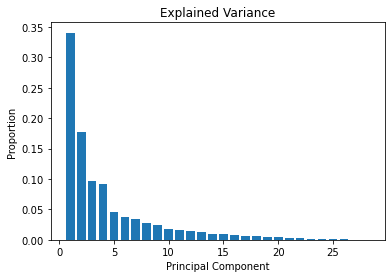

In [10]:
fig,ax = plt.subplots()
x = np.arange(1,varRatio.shape[0]+1,step=1)
ax.bar(x,varRatio)
plt.xlabel('Principal Component')
plt.ylabel('Proportion')
plt.title('Explained Variance')
plt.show()

Based on the elbow method on the proportion of explained vartiance, we identify the number of principle components as 4.

In [11]:
features_afterPCA,var = PCA(std_features, n_components=4)
features_afterPCA

,0,1,2,3
0,-0.509298,0.849811,0.393469,0.134143
1,-0.524192,0.804331,0.272829,0.025675
2,-0.506353,0.779568,0.144278,-0.083415
3,-0.508225,0.608149,0.320215,0.015977
4,0.532407,0.878241,0.295308,-0.008209
...,...,...,...,...
2139,0.694760,0.101963,-0.168205,0.462177
2140,0.702974,-0.098767,-0.104278,0.391034
2141,0.754417,0.223409,-0.099123,0.585517
2142,0.693694,0.438960,-0.066354,0.743558


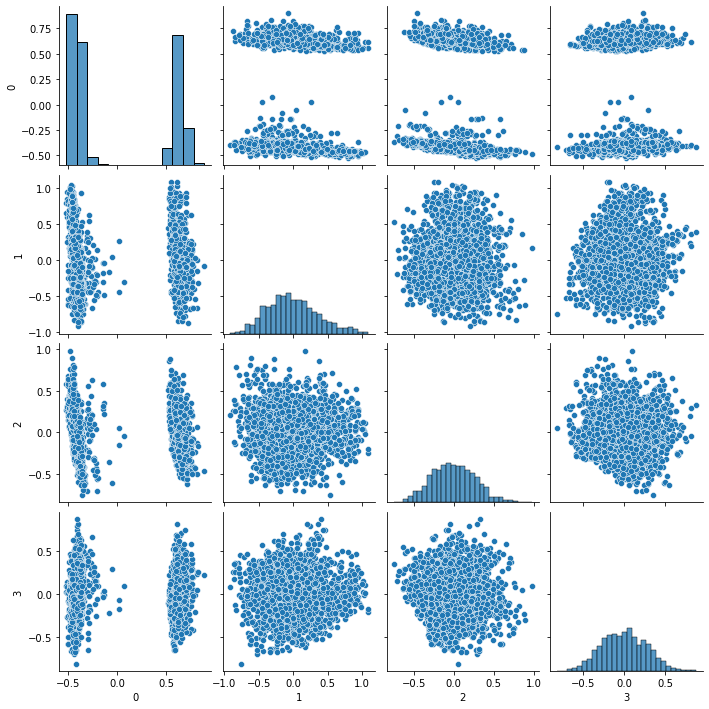

In [12]:
## Pair plot of the PCs
sns.pairplot(features_afterPCA)

## K-Means Clustering

In [13]:
# K-means clustering with k from [1,10]
# compute inertia and silhouette_scores to choose optimal k
sse = []
distortions=[]
s_score=[]
list_k = np.arange(1,10)
for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_afterPCA)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)
    if(k!=1):
        s_score.append(silhouette_score(features_afterPCA,labels))


    

[Text(0.5, 1.0, 'Silhouette score to number of clusters for the EE')]

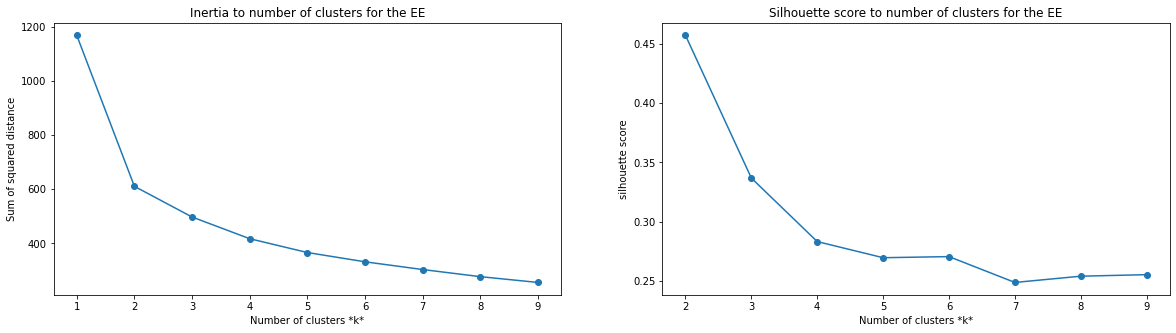

In [60]:
fig, ax = plt.subplots(1, 2,figsize=(20,5))

ax[0].plot(list_k, sse, '-o')
ax[0].set_xlabel(r'Number of clusters *k*')
ax[0].set_ylabel('Sum of squared distance')
ax[0].set(title= 'Inertia to number of clusters for the EE')
ax[1].plot(np.arange(2,10), s_score, '-o')
ax[1].set_xlabel(r'Number of clusters *k*')
ax[1].set_ylabel('silhouette score')
ax[1].set(title ='Silhouette score to number of clusters for the EE')


We can conclude that there are 2 clusters

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(features_afterPCA)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [17]:
cluster_centers

array([[ 0.63161813,  0.01817893,  0.01561977, -0.00715452],
       [-0.41086783, -0.0118254 , -0.01016066,  0.00465402]])

In [18]:
## features and their labels
clustered_features=pd.DataFrame(std_features)
clustered_features = clustered_features.assign(label=pd.Series(labels).values)
clustered_features = clustered_features.assign(team=pd.Series(team_id).values)

In [19]:
## size per cluster
clusters= clustered_features.groupby('label')
size_per_cluster =clusters.size()

In [20]:
## conditional means
mk = clusters.mean()
mk

,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,T1_T1_add,T1_T2_rem,T1_T2_add,...,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time,team
label,,,,,,,,,,,,,,,,,,,,,
0,0.300592,0.000000,1.000000,0.089152,0.009650,0.003787,0.000000,0.00355,0.000000,0.002367,...,0.013794,0.056816,0.499840,0.527996,0.364958,0.159298,0.027065,0.636053,0.537584,26.982249
1,0.010624,0.039774,0.005081,0.042020,0.017173,0.013395,0.025404,0.00154,0.010008,0.000000,...,0.050323,0.070734,0.502527,0.540626,0.364688,0.150280,0.021249,0.638593,0.476930,24.218630


In [22]:
clusterArray=[]
cluster0 = clusters.get_group(0).drop('label',axis='columns')
clusterArray.append(cluster0)


In [23]:
cluster1 = clusters.get_group(1).drop('label',axis='columns')
clusterArray.append(cluster1)

In [24]:
clus01=[]

for feature in columns:
    clus01.append((feature,kruskal(clusterArray[0][feature],clusterArray[1][feature]).pvalue))



In [25]:
clus01.sort(key= lambda elem : elem[1] )

In [26]:
## sorted by ascendant p-value/// features with pvalue > threshold are marked with xx
threshold=0.01
print (' ---- for cluster 0 and cluster 1 :')
for pair in clus01:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))
    


 ---- for cluster 0 and cluster 1 :
 ------ feature:T_add  || pvalue : 0.0
 ------ feature:T_ratio_add_del  || pvalue : 0.0
 ------ feature:T_action  || pvalue : 5.829495483652667e-124
 ------ feature:at_robot  || pvalue : 6.882244756489685e-22
 ------ feature:T_remove  || pvalue : 2.4671586753608902e-21
 ------ feature:redundant_exist  || pvalue : 5.541018342942284e-19
 ------ feature:screen_right  || pvalue : 5.561677485819129e-07
 ------ feature:normalized_time  || pvalue : 2.2144080427822032e-06
 ------ feature:T1_T1_rem  || pvalue : 3.038776446962064e-06
 ------ feature:at_partner  || pvalue : 1.0004471925403747e-05
 ------ feature:T_help  || pvalue : 1.2914678874389762e-05
 ------ feature:T1_T2_rem  || pvalue : 5.0039491063351115e-05
 ------ feature:screen_left  || pvalue : 0.0010232434580917948
 ------ feature:smile  || pvalue : 0.002470129830064683
 ------ feature:T_hist  || pvalue : 0.008651408710653837
 ------ xx  feature:T_long_pauses  || pvalue : 0.020613070983775284
 -----

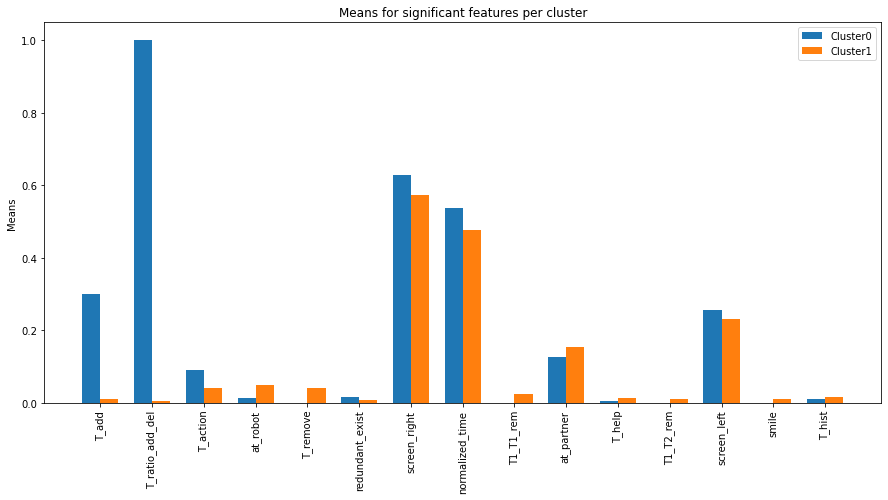

In [27]:
significant_feature01 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus01))))
mean0=list()
mean1=list()
for ft in significant_feature01:
    mean0.append(mk[ft][0])
    mean1.append(mk[ft][1])
x = np.arange(len(significant_feature01))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean0, width, label='Cluster0')
rects2 = ax.bar(x + width/2, mean1, width, label='Cluster1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature01)
plt.xticks(rotation=90)
ax.legend()


plt.show()


## HMM

In [28]:
from hmmlearn import hmm

In [29]:
## For each team the set of observations is a sequence
## So we have #teams sequences with #dp_per_team emissions
## label and team_n should be dropped and obseravtions should be sorted by time
by_team = clustered_features.drop('label',axis=1).groupby('team')
lengths= by_team.count()['normalized_time'].to_numpy()
observations = by_team.get_group(7).drop('team',axis=1).to_numpy()
for name,group in by_team:
    if(name!=7):
        observations = np.concatenate([observations,group.drop('team',axis=1).to_numpy()])

In [30]:
# build HMM model with 3 components and fit it to the observations sequences
## The clustering analysis above suggests 2 or 3 clusters
## Building the HMM model with 3 components however suggests that a third non-trivial state exists
model = hmm.GMMHMM(n_components=3,covariance_type='spherical')
model = model.fit(observations,lengths)

In [31]:
## Indicates whether the model has converged
print(model.monitor_.converged)
model.monitor_.report

True


<bound method ConvergenceMonitor.report of ConvergenceMonitor(
    history=[-242306.68054238756, 36314.75460058884, 36342.38570063867, 36353.902312437225, 36360.28234254934, 36364.378777229664, 36367.23350858262, 36369.23946501726, 36370.57847966104, 36371.415664712666],
    iter=10,
    n_iter=10,
    tol=0.01,
    verbose=False,
)>

In [32]:
## Initial state occupation distribution.
model.startprob_

array([0.13986952, 0.        , 0.86013048])

In [33]:
## Matrix of transition probabilities between states.
model.transmat_

array([[0.63075428, 0.31360774, 0.05563798],
       [0.29566486, 0.56650408, 0.13783106],
       [0.11118137, 0.24038854, 0.64843009]])

In [34]:
## Mixture weights for each state.
model.weights_

array([[1.],
       [1.],
       [1.]])

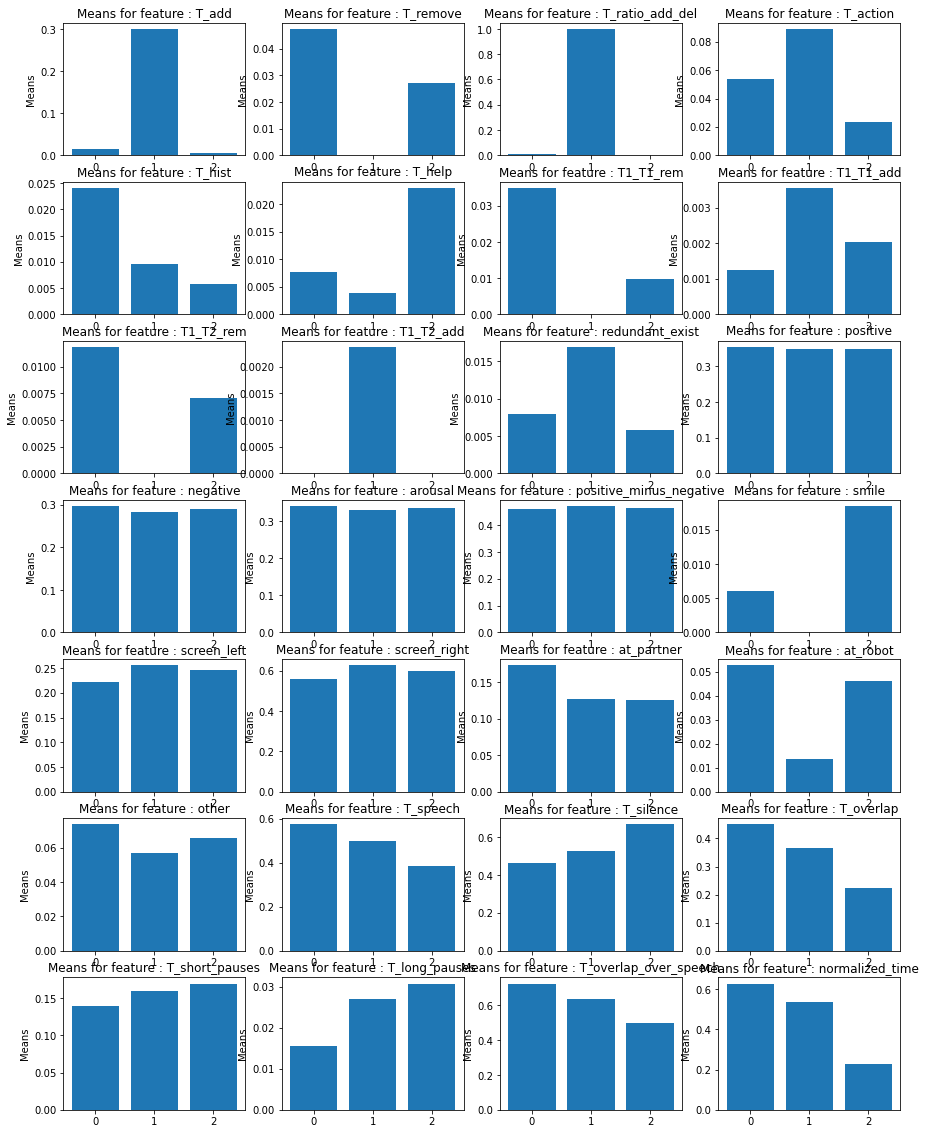

In [35]:
## Kruskall wallis test on the predicted states
states= list(range(3))
## Mean parameters for each mixture component in each state.
fig, axs = plt.subplots(7, 4,figsize=(15,20))
for i in range(len(model.means_[0][0])):
    axs[i//4,i%4].bar(states,model.means_[:,0,i])
    axs[i//4,i%4].set_ylabel('Means')
    axs[i//4,i%4].set_title('Means for feature : '+columns[i])
plt.show()

In [36]:
## Covariance parameters for each mixture components in each state.
model.covars_

array([[0.01761478],
       [0.01642616],
       [0.01448633]])

In [37]:
## predict each dp state
states=[]
for name,group in by_team :
    obs= group.drop('team',axis=1).to_numpy()
    states =  np.concatenate([states,model.predict(obs,lengths=[obs.shape[0]])])
states_d= pd.DataFrame(std_features).assign(state=pd.Series(states).values)
states_dis = states_d.groupby('state')

In [38]:
state0 = states_dis.get_group(0)
state1 = states_dis.get_group(1)
state2 = states_dis.get_group(2)
states_dis.size()

state
0.0    804
1.0    845
2.0    495
dtype: int64

In [39]:
pvalues01 = []
pvalues02= []
pvalues12 = []
pvalues012=[]
for feature in columns:
    try:
        pvalues01.append(kruskal(state0[feature],state1[feature]).pvalue)
    except:
        pvalues01.append(None)
    try :
        pvalues02.append(kruskal(state0[feature],state2[feature]).pvalue)
    except :
        pvalues02.append(None)
    try:
        pvalues12.append(kruskal(state1[feature],state2[feature]).pvalue)
    except:
        pvalues12.append(None)
    try:
        pvalues012.append(kruskal(state0[feature],state1[feature],state2[feature]).pvalue)
    except:
        pvalues012.append(None)
tests_df = pd.DataFrame(index=columns).assign(pvalue_01=pd.Series(pvalues01).values).assign(pvalue_02=pd.Series(pvalues02).values)
tests_df = tests_df.assign(pvalue_12=pd.Series(pvalues12).values).assign(pvalue_012=pd.Series(pvalues012).values)
tests_df = tests_df.assign(mean_0=pd.Series(model.means_[0][0]).values).assign(mean_1=pd.Series(model.means_[1][0]).values)
tests_df = tests_df.assign(mean_2=pd.Series(model.means_[2][0]).values)
tests_df=tests_df.sort_values('pvalue_012')
tests_df

,pvalue_01,pvalue_02,pvalue_12,pvalue_012,mean_0,mean_1,mean_2
T_add,1.125388e-286,1.060674e-02,5.295626e-224,0.000000e+00,1.379324e-02,3.005942e-01,5.391591e-03
T_ratio_add_del,0.000000e+00,1.037850e-02,1.148434e-291,0.000000e+00,6.629378e-03,9.999943e-01,2.524662e-03
normalized_time,7.514886e-12,1.491132e-126,1.210963e-83,8.044419e-135,6.289650e-01,5.375824e-01,2.263758e-01
T_action,7.757945e-69,2.258403e-10,3.946431e-120,6.847956e-132,5.349219e-02,8.915251e-02,2.311067e-02
T_overlap,5.301578e-20,9.907765e-103,2.951438e-38,2.338841e-98,4.499793e-01,3.649571e-01,2.241290e-01
T_overlap_over_speech,3.982060e-16,2.745020e-89,3.333944e-34,9.304763e-85,7.243366e-01,6.360527e-01,4.972876e-01
T_silence,1.207676e-11,3.709182e-81,7.832571e-40,5.376800e-80,4.641672e-01,5.279974e-01,6.666277e-01
T_speech,5.748822e-18,1.039203e-81,7.413203e-31,1.546019e-79,5.743592e-01,4.998388e-01,3.841473e-01
T_remove,4.031355e-26,2.494629e-04,4.666455e-13,6.414395e-25,4.745591e-02,2.725913e-06,2.711051e-02
at_robot,5.590916e-21,2.211994e-01,1.257942e-12,3.401919e-21,5.273260e-02,1.379387e-02,4.635186e-02


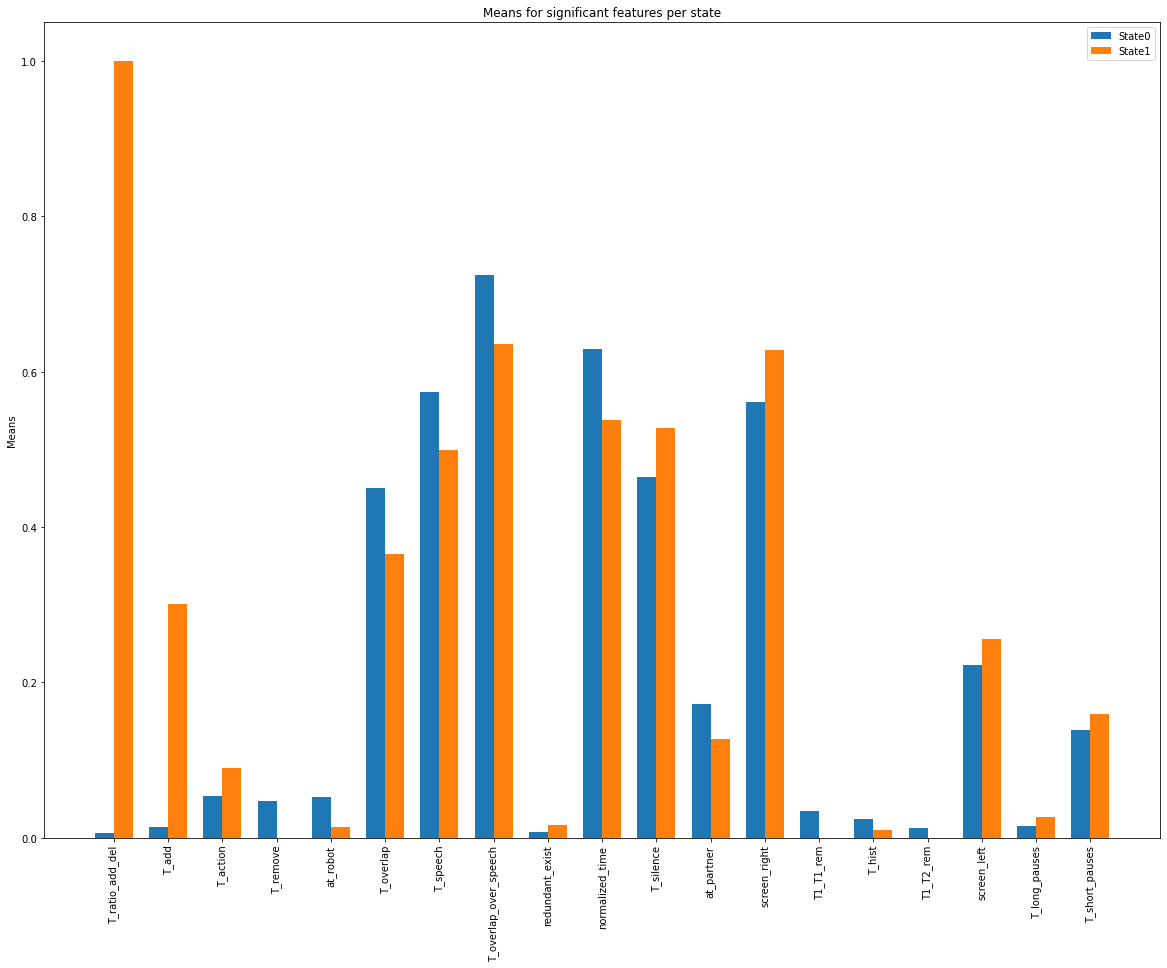

In [40]:
filtered= tests_df[tests_df['pvalue_01']<0.01]
filtered=filtered.sort_values('pvalue_01')
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean1=filtered['mean_1'].to_list()
x = np.arange(len(significant))
width = 0.35 
fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width/2, mean0, width, label='State0')
rects1 = ax.bar(x + width/2, mean1, width, label='State1')
ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

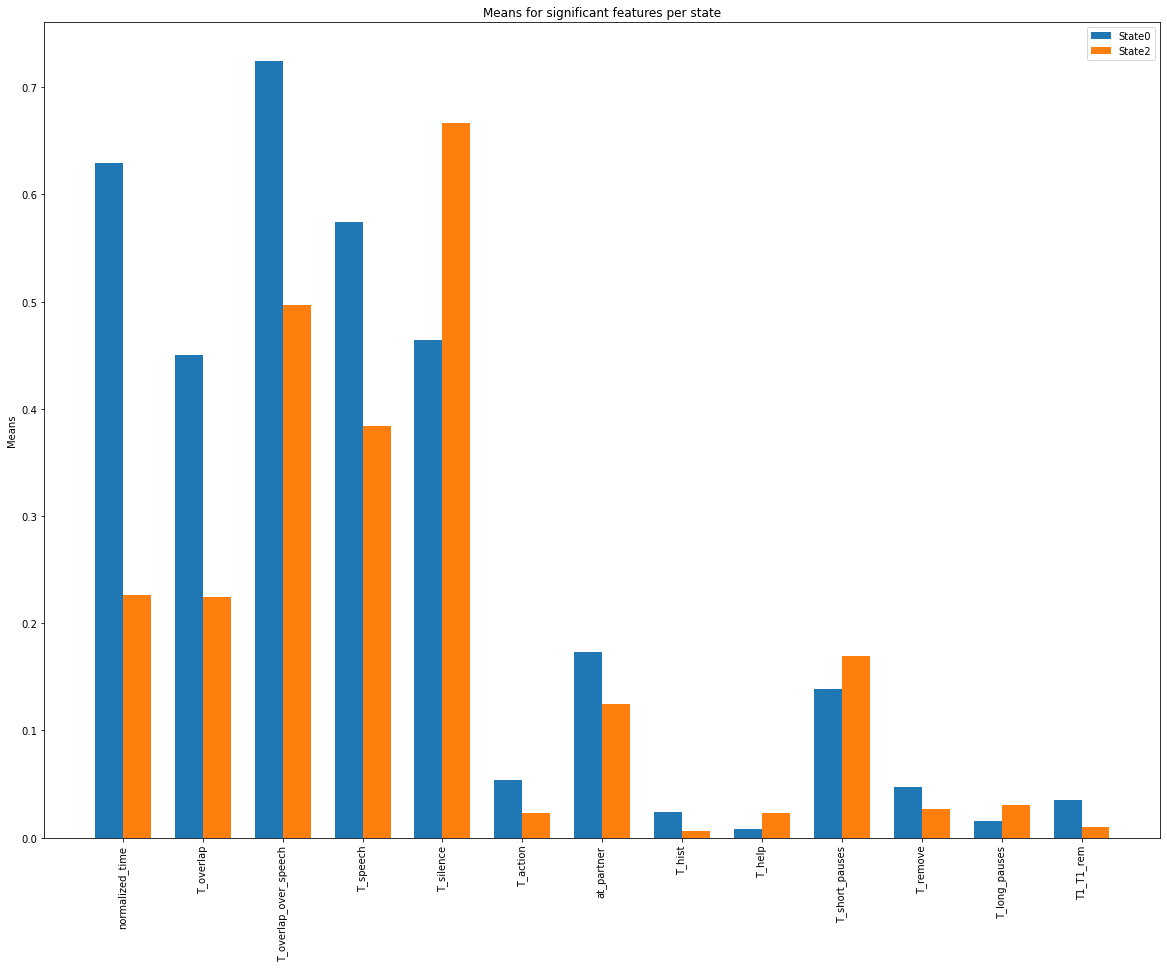

In [41]:
filtered= tests_df[tests_df['pvalue_02']<0.01]
filtered=filtered.sort_values('pvalue_02')
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean2=filtered['mean_2'].to_list()
x = np.arange(len(significant))
width = 0.35  
fig, ax = plt.subplots(figsize=(20,15))
rects0 = ax.bar(x - width/2, mean0, width, label='State0')
rects2 = ax.bar(x + width/2, mean2, width, label='State2')
ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

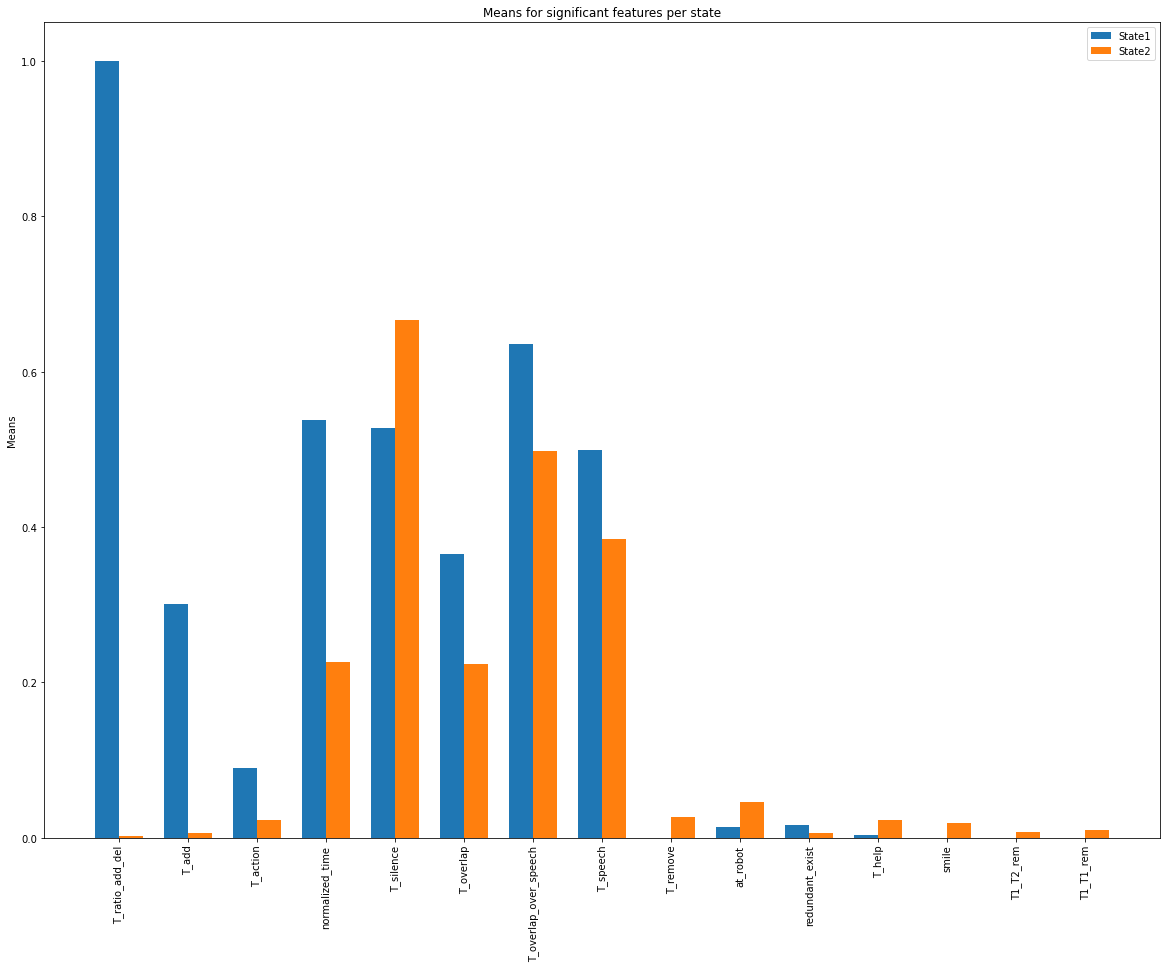

In [42]:
filtered= tests_df[tests_df['pvalue_12']<0.01]
filtered=filtered.sort_values('pvalue_12')
significant = filtered.index.to_list()
mean1=filtered['mean_1'].to_list()
mean2=filtered['mean_2'].to_list()
x = np.arange(len(significant))
width = 0.35 
fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width/2, mean1, width, label='State1')
rects2 = ax.bar(x + width/2, mean2, width, label='State2')
ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

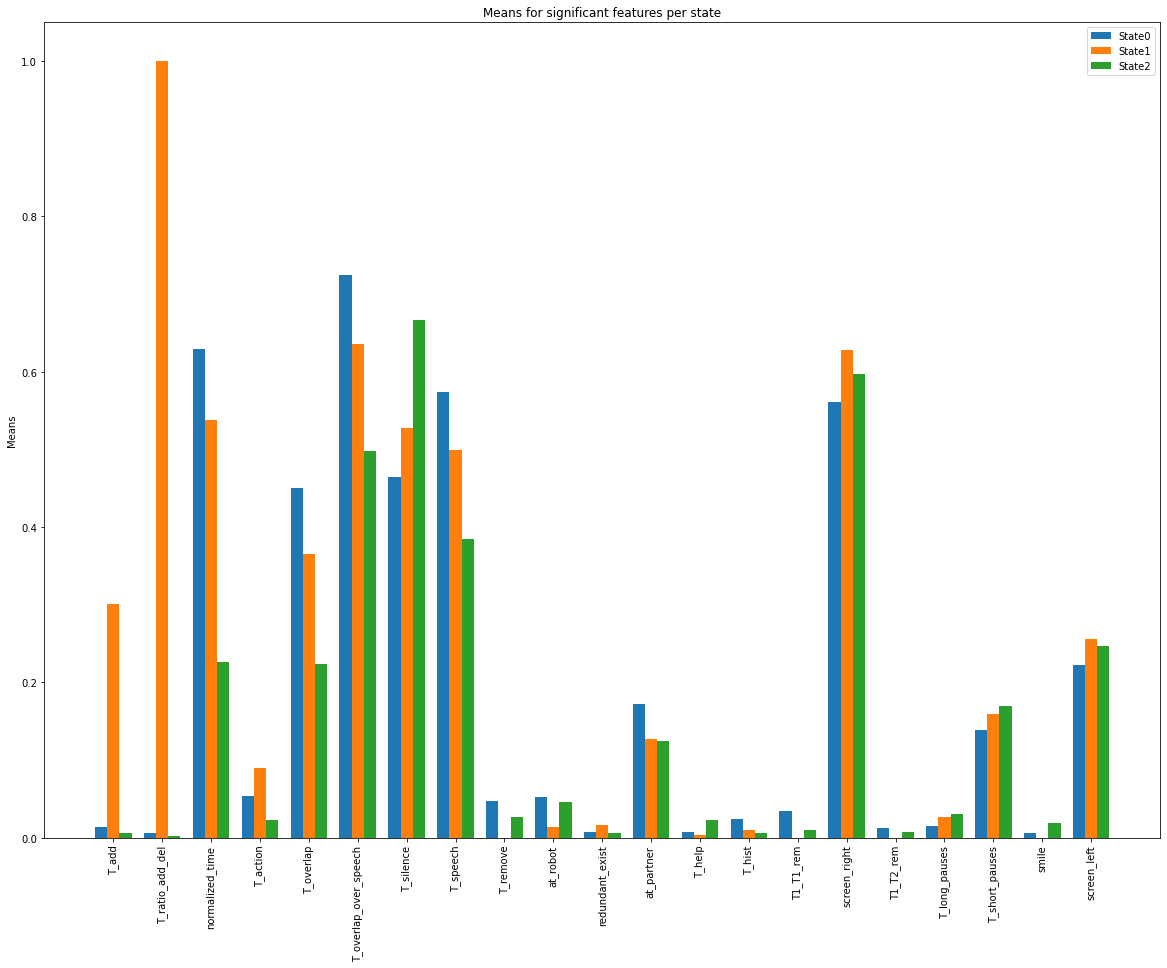

In [43]:
filtered= tests_df[tests_df['pvalue_012']<0.01]
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean1=filtered['mean_1'].to_list()
mean2=filtered['mean_2'].to_list()

x = np.arange(len(significant))
x=x+0.5
width = 0.25 

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width, mean0, width, label='State0')
rects1 = ax.bar(x , mean1, width, label='State1')
rects2 = ax.bar(x + width, mean2, width, label='State2')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

In [44]:
log=columns[:11]
video=columns[11:21]
audio=columns[21:-1]
sort_by=filtered.index.map(lambda x: 0 if(x in log) else (1 if(x in video) else (2 if(x in audio) else 3)))
graph = filtered.assign(sort_by=sort_by)
graph=graph.sort_values('sort_by',axis=0)
graph=graph.drop('smile',axis=0)
description = ['''Highest''','''High''','''Medium''','''Low''','''Lowest''']
mean0=graph['mean_0'].to_list()
mean1=graph['mean_1'].to_list()
mean2=graph['mean_2'].to_list()
means=[mean0,mean1,mean2]
significant=graph.index.to_list()
colors= ['''''','''''','''''']

In [45]:
#Generate state description
# Highest Value for each feature is marked with highest, same for lowest
# the remaining value is High, Medium, Low based on its distance from the min and the max
states_des=[["","",""],["","",""],["","",""],["","",""]]
new_des=["","",""]
i=0
for ft in significant:
    max_value= max(means[0][i],means[1][i],means[2][i])
    min_value=min(means[0][i],means[1][i],means[2][i])
    for j in range(3):
        if(means[j][i]==max_value):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[0] +"<br/>"
        elif(((means[j][i]-min_value)/(max_value-min_value))>2/3):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[1] +"<br/>"
        elif (((means[j][i]-min_value)/(max_value-min_value))>1/3):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[2] +"<br/>"
        elif(means[j][i]==min_value):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[4] +"<br/>"
        else:
            new_des[j]= "{:<30}".format(ft)+'\t'+ description[3] +"<br/>"
    if not(new_des[0]==new_des[1] and new_des[0]==new_des[2] and new_des[2]==new_des[1]):
        for j in range(3):
            states_des[graph.loc[ft,'sort_by']][j]+=new_des[j]
    i+=1

In [47]:
import graphviz as gr

In [48]:
G= gr.Digraph('Type1HMMStateDiagram',format='jpeg')
G.attr('graph',pad='1',ranksep='1',nodesep='1')
prob="{proba:.2e}"

widths= [4,4,4]
widths[np.argmin(model.startprob_)] = 0.5
widths[np.argmax(model.startprob_)]=6

G.attr('node',color='red')
G.node('0.0','''<<font color="blue">''' + states_des[0][0]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][0]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][0]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][0]+'''</font>>''',shape='box')

G.node('1.0','''<<font color="blue">''' + states_des[0][1]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][1]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][1]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][1]+'''</font>>''',shape='box')

G.node('2.0','''<<font color="blue">''' + states_des[0][2]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][2]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][2]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][2]+'''</font>>''',shape='box')

G.attr('node',penwidth=str(widths[0]))
G.node('0','State 0\n\nInitial state probability: '+prob.format(proba=model.startprob_[0]))
G.attr('node',penwidth=str(widths[1]))
G.node('1','State 1\n\nInitial state probability: '+prob.format(proba=model.startprob_[1]))
G.attr('node',penwidth=str(widths[2]))
G.node('2','State 2\n\nInitial state probability: '+prob.format(proba=model.startprob_[2]))


prob="{proba:.3f}"
G.attr('edge',penwidth=str(10*model.transmat_[0][0]))
G.edge('0','0',prob.format(proba=model.transmat_[0][0]))
G.attr('edge',penwidth=str(10*model.transmat_[0][1]))
G.edge('0','1',prob.format(proba=model.transmat_[0][1]))
G.attr('edge',penwidth=str(10*model.transmat_[0][2]))
G.edge('0','2',prob.format(proba=model.transmat_[0][2]))

G.attr('edge',penwidth=str(10*model.transmat_[1][0]))
G.edge('1','0',prob.format(proba=model.transmat_[1][0]))
G.attr('edge',penwidth=str(10*model.transmat_[1][1]))
G.edge('1','1',prob.format(proba=model.transmat_[1][1]))
G.attr('edge',penwidth=str(10*model.transmat_[1][2]))
G.edge('1','2',prob.format(proba=model.transmat_[1][2]))

G.attr('edge',penwidth=str(10*model.transmat_[2][0]))
G.edge('2','0',prob.format(proba=model.transmat_[2][0]))
G.attr('edge',penwidth=str(10*model.transmat_[2][1]))
G.edge('2','1',prob.format(proba=model.transmat_[2][1]))
G.attr('edge',penwidth=str(10*model.transmat_[2][2]))
G.edge('2','2',prob.format(proba=model.transmat_[2][2]))

G.attr('edge',penwidth=str(1))
G.attr('edge',fontcolor='red')
G.attr('edge',dir='none')
G.attr('edge',color='red')
G.edge('0','0.0','Key Features')
G.edge('1','1.0','Key Features')
G.edge('2','2.0','Key Features')
G.graph_attr.update(size="15,12")

G.view()



'Type1HMMStateDiagram.gv.jpeg'